# Importing and exporting graphs
## Import a graph from a pandas Dataframe.

This is better explained with an example.
We will use the [CEO Club Memberships](https://icon.colorado.edu/#!/networks) data.

In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd

membership = pd.read_csv("../Data/club_membership",skiprows=1,delimiter=" ")
membership.head()

,%,95,25,15
0,1,1,NaN,NaN
1,1,2,NaN,NaN
2,1,3,NaN,NaN
3,2,1,NaN,NaN
4,2,4,NaN,NaN


We have to work a bit with the dataframe first,

We know that the Graph is Bipartite and undirected.

First colum is a member and second column is a Club.

Each row corresponds to an edge, everything else is noise.

Steps to do:
1. Keep only first and second column
2. Rename the columns in Members and Clubs respectively
3. Add a suffix on each entry of `member_` or `club`.
> Third step is required (or any similar solution), since the graph is bipartite 
> and this is an easy way to distinguish the to sets of nodes, since they have same names.

In [2]:
#Step 1
membership.drop(columns=['25','15'], inplace=True)
#Step 2
membership.rename(columns={'%':'Members','95':'Clubs'},inplace=True)
#Step 3
membership['Members'] = membership['Members'].apply(lambda x: f"member_{x}")
membership['Clubs'] = membership['Clubs'].apply(lambda x: f"club_{x}")
membership.head()

,Members,Clubs
0,member_1,club_1
1,member_1,club_2
2,member_1,club_3
3,member_2,club_1
4,member_2,club_4


We can now use the techniques seen in the previous [Notebook](1.Graph_Creation.ipynb).

For improve readability we will first extract the nodes in both Member set and Club set, and get a unique entry list, that will become the vertices of the graph.

We the can:
- iter rows and add the edges (slow way)
- use the function of pandas `to_records` to get an array of tuples. 

> Since the graph is bipartite, we can pass it as an attribute, but `type` must be int or bool.

In [3]:
members = membership['Members'].unique().tolist()
clubs = membership['Clubs'].unique().tolist()
#Also work if is not converted to list (was a ndArray)
edges = membership.to_records(index=False).tolist()

membership_graph = ig.Graph(directed=False)
#Attributes are broadcasted
membership_graph.add_vertices(members,attributes={"type":1})
membership_graph.add_vertices(clubs,attributes={"type":0})

membership_graph.add_edges(edges)

if membership_graph.is_bipartite() : print("The Graph is Bipartite")
print(f"First vertices:{list(membership_graph.vs[:2])}\n")
print(f"Last vertices:{list(membership_graph.vs[-2:])}\n")


The Graph is Bipartite
First vertices:[igraph.Vertex(<igraph.Graph object at 0x79256d536750>, 0, {'name': 'member_1', 'type': 1}), igraph.Vertex(<igraph.Graph object at 0x79256d536750>, 1, {'name': 'member_2', 'type': 1})]

Last vertices:[igraph.Vertex(<igraph.Graph object at 0x79256d536750>, 38, {'name': 'club_14', 'type': 0}), igraph.Vertex(<igraph.Graph object at 0x79256d536750>, 39, {'name': 'club_15', 'type': 0})]



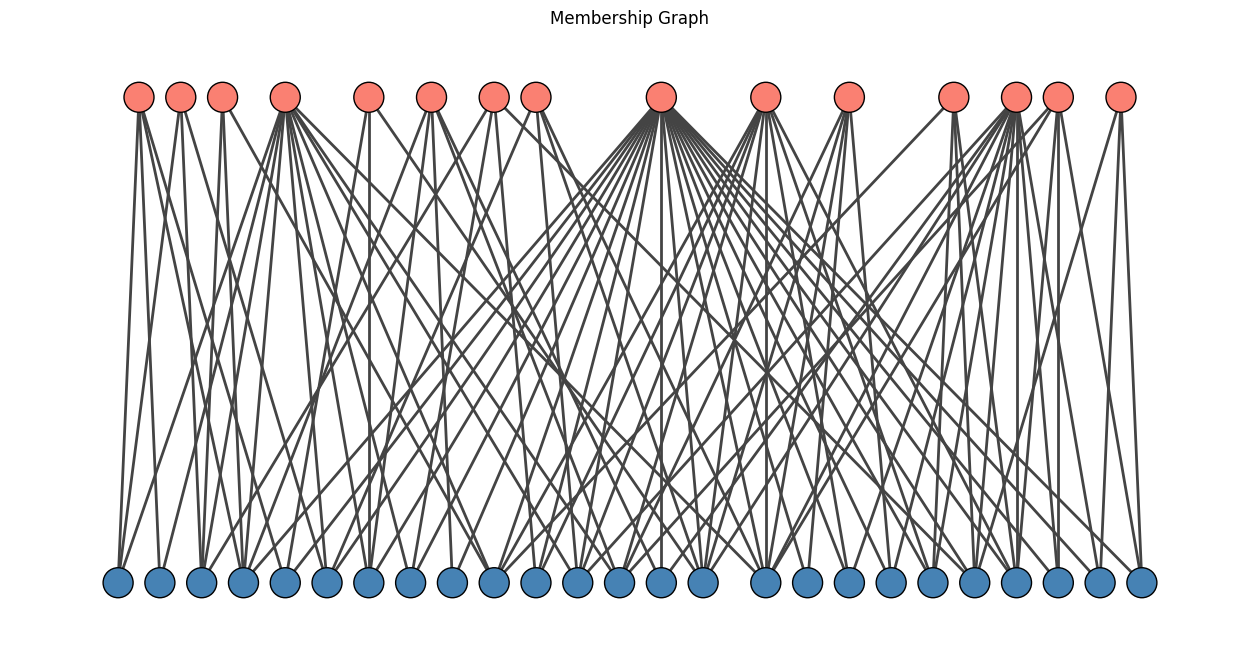

In [4]:
fig, ax = plt.subplots(figsize=(16,8))
plt.title("Membership Graph")

ig.plot(
    membership_graph,
    target=ax,
    layout=membership_graph.layout_bipartite(),
    #vertex_label=membership_graph.vs["name"],
    vertex_color=["steelblue" if type == 1 else "salmon" for type in membership_graph.vs["type"]],
)
plt.show()

## Exporting and exporting a Graph is standard formats

There are many formats for exporting a graph, we will show a few. For an extensive list see the [official documentation](https://python.igraph.org/en/latest/tutorial.html#igraph-and-the-outside-world).

We will first use two important formats:
1. [GML](https://en.wikipedia.org/wiki/Geography_Markup_Language)
2. [GraphML](https://en.wikipedia.org/wiki/GraphML)

Let's save the `membership` graph we build earlier in those formats. In this example both are xml. If we want to save them in a directory it has to be created in advance.
> Even if they are xml, they need their extension type.

In [5]:
from os import mkdir, stat
export_path = "../Exported_Graphs"

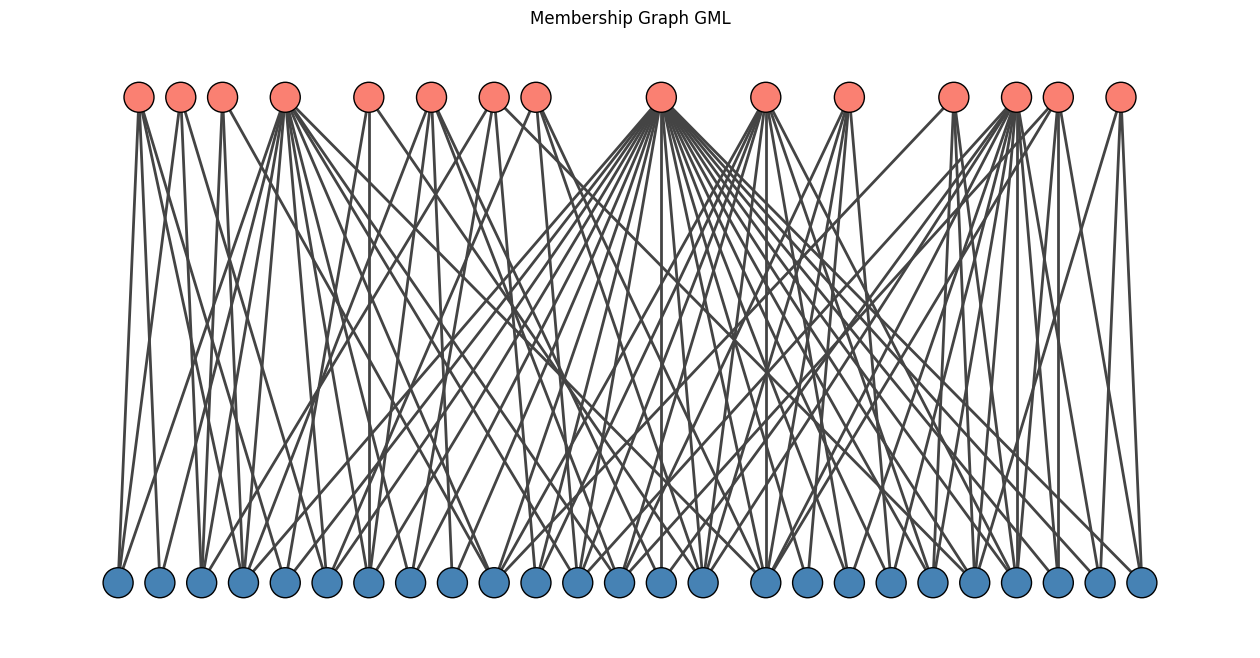

In [6]:
try:
    mkdir(export_path)
except FileExistsError: pass

membership_graph.write_gml(f"{export_path}/membership.gml")
gml_membership = ig.Graph.Read_GML(f"{export_path}/membership.gml")

fig, ax = plt.subplots(figsize=(16, 8))
plt.title("Membership Graph GML")

ig.plot(
    gml_membership,
    target=ax,
    layout=gml_membership.layout_bipartite(),
    vertex_color=["steelblue" if type == 1 else "salmon" for type in gml_membership.vs["type"]],
)
plt.show()

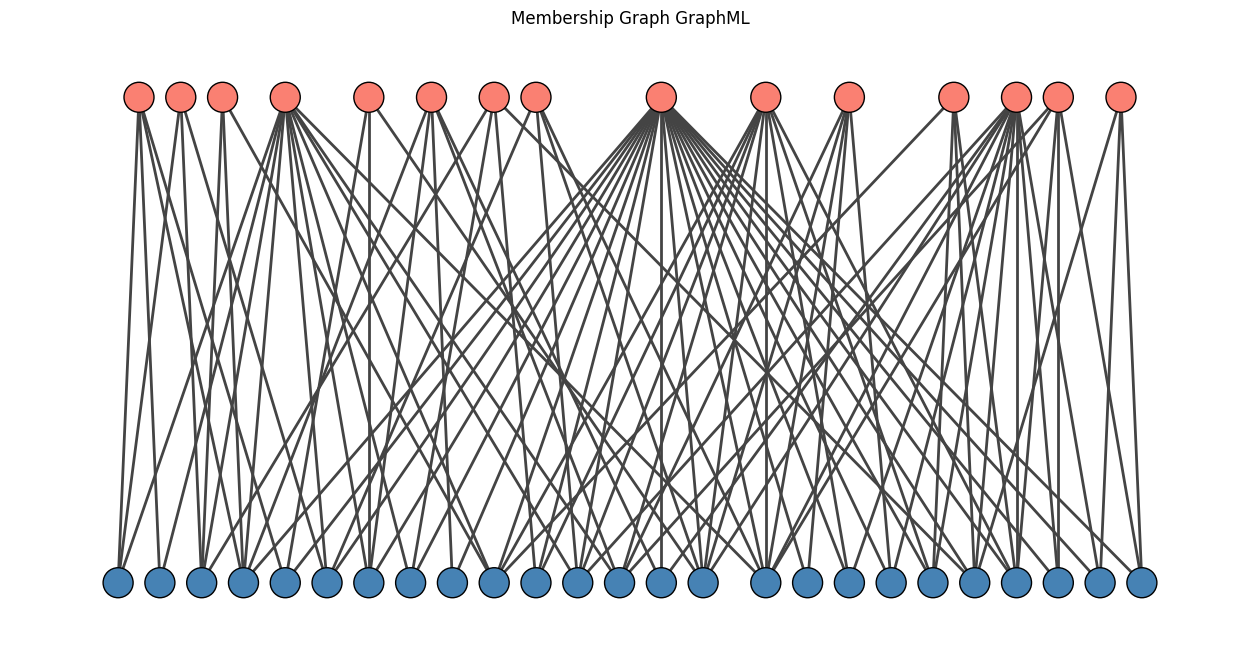

In [7]:
try:
    mkdir(export_path)
except FileExistsError: pass

membership_graph.write_graphml(f"{export_path}/membership.graphml")
graphml_membership = ig.Graph.Read_GraphML(f"{export_path}/membership.graphml")

fig, ax = plt.subplots(figsize=(16, 8))
plt.title("Membership Graph GraphML")

ig.plot(
    graphml_membership,
    target=ax,
    layout=graphml_membership.layout_bipartite(),
    vertex_color=["steelblue" if type == 1 else "salmon" for type in graphml_membership.vs["type"]],
)
plt.show()

For GraphML there is also a zipped format, that of course takes less space in disk.
We just have to specify the compression rate from 1 to 9, with 9 the smallest but also the slowest to compress.

> Be carefully to use the appropriate function `Graph.write_graphmlz()` and `Graph.Read_GraphMLz().` **NOTE the z**.


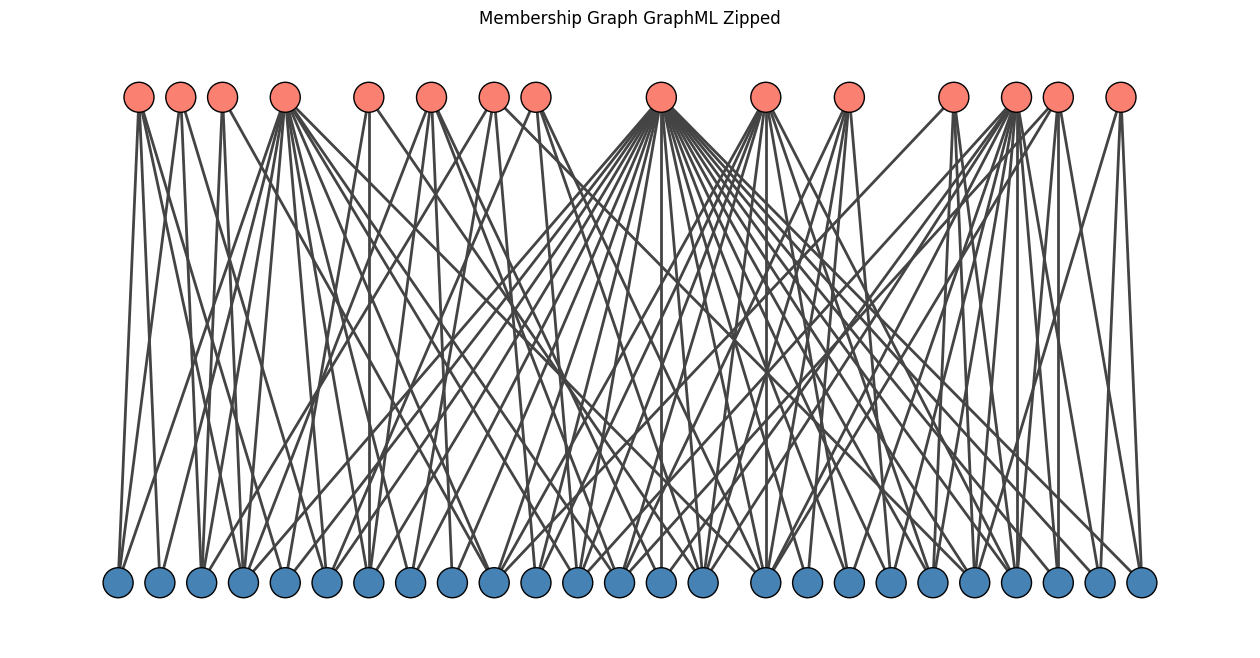

In [8]:
try:
    mkdir(export_path)
except FileExistsError: pass

membership_graph.write_graphmlz(f"{export_path}/membership_zipped.graphml",9)
graphml_membership_zipped = ig.Graph.Read_GraphMLz(f"{export_path}/membership_zipped.graphml")

fig, ax = plt.subplots(figsize=(16, 8))
plt.title("Membership Graph GraphML Zipped")

ig.plot(
    graphml_membership_zipped,
    target=ax,
    layout=graphml_membership_zipped.layout_bipartite(),
    vertex_color=["steelblue" if type == 1 else "salmon" for type in graphml_membership_zipped.vs["type"]],
)
plt.show()

In [9]:
compressed = stat("../Exported_Graphs/membership_zipped.graphml").st_size
not_compressed = stat("../Exported_Graphs/membership.graphml").st_size

print(f"Compressed version is {(not_compressed / compressed):.2f} times smaller.")


Compressed version is 10.06 times smaller.
